In [1]:
## import dependenacies
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import flask
from flask import request
from flask_cors import CORS
import pickle


In [2]:
#### Read the csv file into a pandas DataFrame

df = pd.read_csv("activities.csv")
df.head(10)

,activities,devicesBR,devicescount,usage,Rules,enforce,behaviour,rate,ratesleep
0,bath,tv,1,frequently,bedtime,yes,schoolperformance,10,good
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9,good
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8,good
3,pray,videogame,4,frequently,textinbed,no,qualitylife,7,ok
4,read,computer,5,sometimes,onoff,yes,active,6,ok
5,exercise,laptop,6,never,homework_late,no,extralessons,5,bad
6,alcohol,mp3,7,frequently,musiclate,yes,phoneinbed,4,bad
7,spouse,musicgadgets,8,sometimes,gameslate,no,pets,3,bad
8,medication,Unknown,9,never,deviceslate,yes,lightingtemp,2,bad


In [3]:
# df_copy = df.copy()
# df_copy['rate_sleep'] = df_copy['rate'].rank()
# df_copy

,activities,devicesBR,devicescount,usage,Rules,enforce,behaviour,rate,ratesleep,rate_sleep
0,bath,tv,1,frequently,bedtime,yes,schoolperformance,10,good,9.0
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9,good,8.0
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8,good,7.0
3,pray,videogame,4,frequently,textinbed,no,qualitylife,7,ok,6.0
4,read,computer,5,sometimes,onoff,yes,active,6,ok,5.0
5,exercise,laptop,6,never,homework_late,no,extralessons,5,bad,4.0
6,alcohol,mp3,7,frequently,musiclate,yes,phoneinbed,4,bad,3.0
7,spouse,musicgadgets,8,sometimes,gameslate,no,pets,3,bad,2.0
8,medication,Unknown,9,never,deviceslate,yes,lightingtemp,2,bad,1.0


In [6]:
df = pd.read_csv("activities.csv")
df.head(10)

,activities,devicesBR,devicescount,usage,Rules,enforce,behaviour,rate,ratesleep
0,bath,tv,1,frequently,bedtime,yes,schoolperformance,10,good
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9,good
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8,good
3,pray,videogame,4,frequently,textinbed,no,qualitylife,7,ok
4,read,computer,5,sometimes,onoff,yes,active,6,ok
5,exercise,laptop,6,never,homework_late,no,extralessons,5,bad
6,alcohol,mp3,7,frequently,musiclate,yes,phoneinbed,4,bad
7,spouse,musicgadgets,8,sometimes,gameslate,no,pets,3,bad
8,medication,Unknown,9,never,deviceslate,yes,lightingtemp,2,bad


In [6]:
df = df.dropna()
df = df.drop_duplicates()
df.head(10)

,activities,devicesBR,devicescount,usage,Rules,enforce,behaviour,rate,ratesleep
0,bath,tv,1,frequently,bedtime,yes,schoolperformance,10,good
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9,good
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8,good
3,pray,videogame,4,frequently,textinbed,no,qualitylife,7,ok
4,read,computer,5,sometimes,onoff,yes,active,6,ok
5,exercise,laptop,6,never,homework_late,no,extralessons,5,bad
6,alcohol,mp3,7,frequently,musiclate,yes,phoneinbed,4,bad
7,spouse,musicgadgets,8,sometimes,gameslate,no,pets,3,bad
8,medication,Unknown,9,never,deviceslate,yes,lightingtemp,2,bad


In [12]:
df.shape

(9, 9)

In [4]:
##loc is label-based, which means that we have to specify the name of the rows and columns that we need to filter out.
X = df.loc[:,['activities','devicesBR','devicescount','usage','Rules','enforce','behaviour','rate']]
y = df.ratesleep

In [5]:
X.head()

,activities,devicesBR,devicescount,usage,Rules,enforce,behaviour,rate
0,bath,tv,1,frequently,bedtime,yes,schoolperformance,10
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8
3,pray,videogame,4,frequently,textinbed,no,qualitylife,7
4,read,computer,5,sometimes,onoff,yes,active,6


In [19]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['activities','devicesBR','devicescount','usage','Rules','enforce','behaviour','rate']]= \
X.loc[:,['activities','devicesBR','devicescount','usage','Rules','enforce','behaviour','rate']].apply(enc.fit_transform)

In [11]:
X.head()


,activities,devicesBR,devices_count,usage,Rules,enforce,behaviour,rate
0,1,7,0,0,0,1,7,8
1,4,6,1,2,8,0,4,7
2,7,2,2,1,2,1,1,6
3,5,8,3,0,7,0,6,5
4,6,1,4,2,6,1,0,4


In [20]:
y.head()

0    good
1    good
2    good
3      ok
4      ok
Name: ratesleep, dtype: object

<AxesSubplot:>

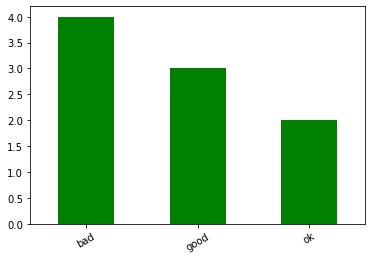

In [22]:
##Barplot to visualize the number of samples for each category in the target variable
df['ratesleep'].value_counts().plot.bar( rot=30, color="green", width=0.5)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [25]:
model.fit(X, y)

DecisionTreeClassifier()

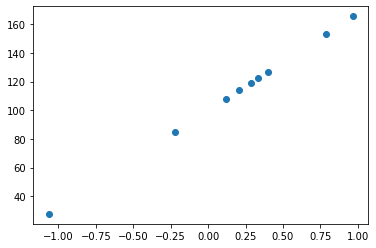

In [26]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=9, n_features=1, bias=100)
plt.scatter(X, y)

In [ ]:
###The response or output is directly proportional to the input We can see from the data that we have a linear trend in our model. 
# (The response or output is directly proportional to the input) We can use Linear Regression to fit a line through the data.

In [27]:
##Is bathing often rated good ?

model.predict([[1,7,0,0,0,1,7,8]])

array(['good'], dtype=object)

In [28]:
##having 5 devices in BR, is it good or bad ?

model.predict([[6,1,4,2,6,1,0,4]])


array(['ok'], dtype=object)

In [29]:
### Extracting model for flask
import joblib
joblib.dump(model,'sleep_analysis.ml')


['sleep_analysis.ml']

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [31]:
#Fitting model with trainig data
regressor.fit(X, y)

LinearRegression()

In [32]:
# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

In [37]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model)



LinearRegression()
